Katie Hippe 

ATM S 380

Homework 4

March 5, 2025

PART A

In [2]:
# imports and file loads 

import numpy as np
import xarray as xr #loads xarray
import matplotlib.pyplot as plt


historical = xr.open_dataset('tas_Amon_CESM2_historical_r4i1p1f1_gn_185001-201412.nc') #opens a dataset
historical["time"] = historical["time"].astype("datetime64[ns]")
historical = historical[["tas"]]

ssp585_1 = xr.open_dataset('tas_Amon_CESM2_ssp585_r4i1p1f1_gn_201501-206412.nc')
ssp585_1["time"] = ssp585_1["time"].astype("datetime64[ns]")
ssp585_1 = ssp585_1[["tas"]]

ssp585_2 = xr.open_dataset('tas_Amon_CESM2_ssp585_r4i1p1f1_gn_206501-210012.nc')
ssp585_2["time"] = ssp585_2["time"].astype("datetime64[ns]")
ssp585_2 = ssp585_2[["tas"]]

area = xr.open_dataset('areacella_fx_CESM2_historical_r4i1p1f1_gn.nc')


#dataset #put in its own cell to display what's in the file
#dataset.lat.values[0] #access the first value of latitude
#dataset.lon.values[0] #access the first value of longitude
#np.shape(dataset.tas) #gives shape of the variable tas (1980 months, 192 latitude indices, 288 longitude indices)
#dataset.tas.values[0,0,0] #access the value of tas in the first month, at lat = -90 and lon = 0

C:\Users\katie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xarray\conventions.py:200: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
C:\Users\katie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xarray\conventions.py:200: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
C:\Users\katie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xarray\conventions.py:200: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.

In [6]:
# create our yearly predictions 

years = np.arange(1850,2101) # all our years

temps = [] # initialize a vector to hold for each year

w_historical = historical.weighted(area.areacella.mean("lon")).mean(("lat","lon"))
w_ssp585_1 = ssp585_1.weighted(area.areacella.mean("lon")).mean(("lat","lon"))
w_ssp585_2 = ssp585_2.weighted(area.areacella.mean("lon")).mean(("lat","lon"))

temps = xr.concat([w_historical,w_ssp585_1,w_ssp585_2], dim="time") # maybe have to split this up?

anom = w_ssp585_2[["tas"]] - w_historical[["tas"]].mean()

anom = w_ssp585_2.sel(time=slice("2080-01-01", "2100-12-31"))[["tas"]] - w_historical.sel(time=slice("1850-01-01", "1900-12-31"))[["tas"]].mean("time")


mean_anom = anom.mean()
print(mean_anom)





<xarray.Dataset> Size: 4B
Dimensions:  ()
Data variables:
    tas      float32 4B 5.511


C:\Users\katie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xarray\groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


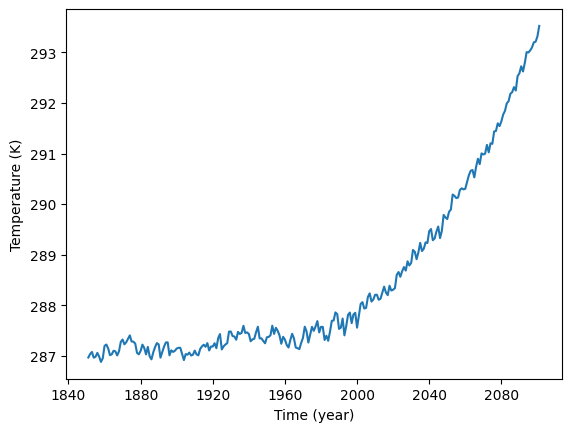

C:\Users\katie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xarray\groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


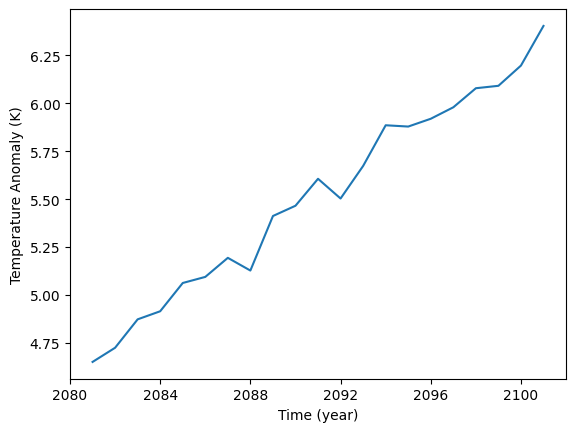

In [7]:
# plot the time series and anomolies

temps.resample(time="1Y").mean().tas.plot()
plt.xlabel("Time (year)")
plt.ylabel("Temperature (K)")
plt.show()

anom.resample(time="1Y").mean().tas.plot()
plt.xlabel("Time (year)")
plt.ylabel("Temperature Anomaly (K)")
plt.show()



PART B

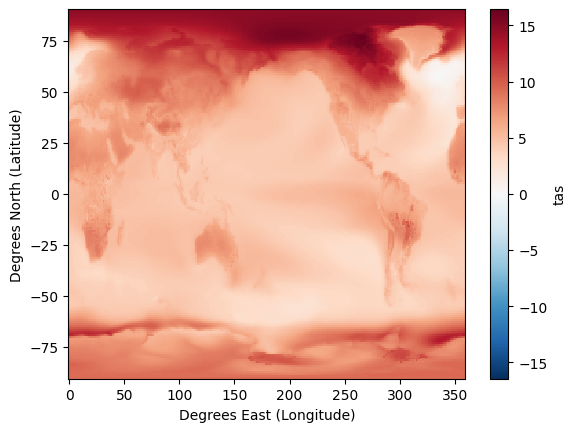

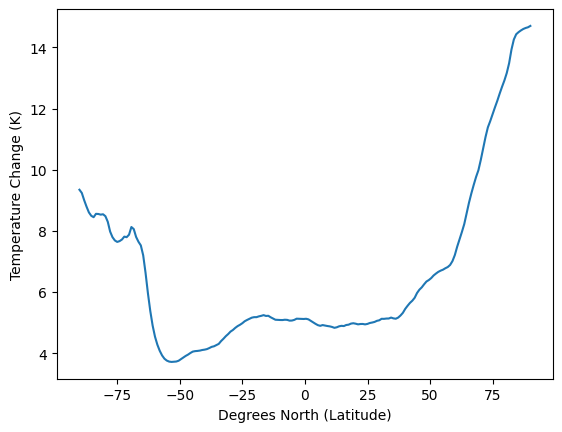

In [8]:
anom = ssp585_2.sel(time=slice("2080-01-01", "2100-12-31"))[["tas"]].mean("time") - historical.sel(time=slice("1850-01-01", "1900-12-31"))[["tas"]].mean("time")
anom.tas.plot()
plt.xlabel("Degrees East (Longitude)")
plt.ylabel("Degrees North (Latitude)")
plt.show()

anom.tas.mean("lon").plot()
plt.xlabel("Degrees North (Latitude)")
plt.ylabel("Temperature Change (K)")
plt.show()

